#### Import Library

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#### requests library를 통해 http 요청을 보내면 요청값의 소스에 해당하는 응답(response)을 받게 됨

In [2]:
res = requests.get("https://news.daum.net/")

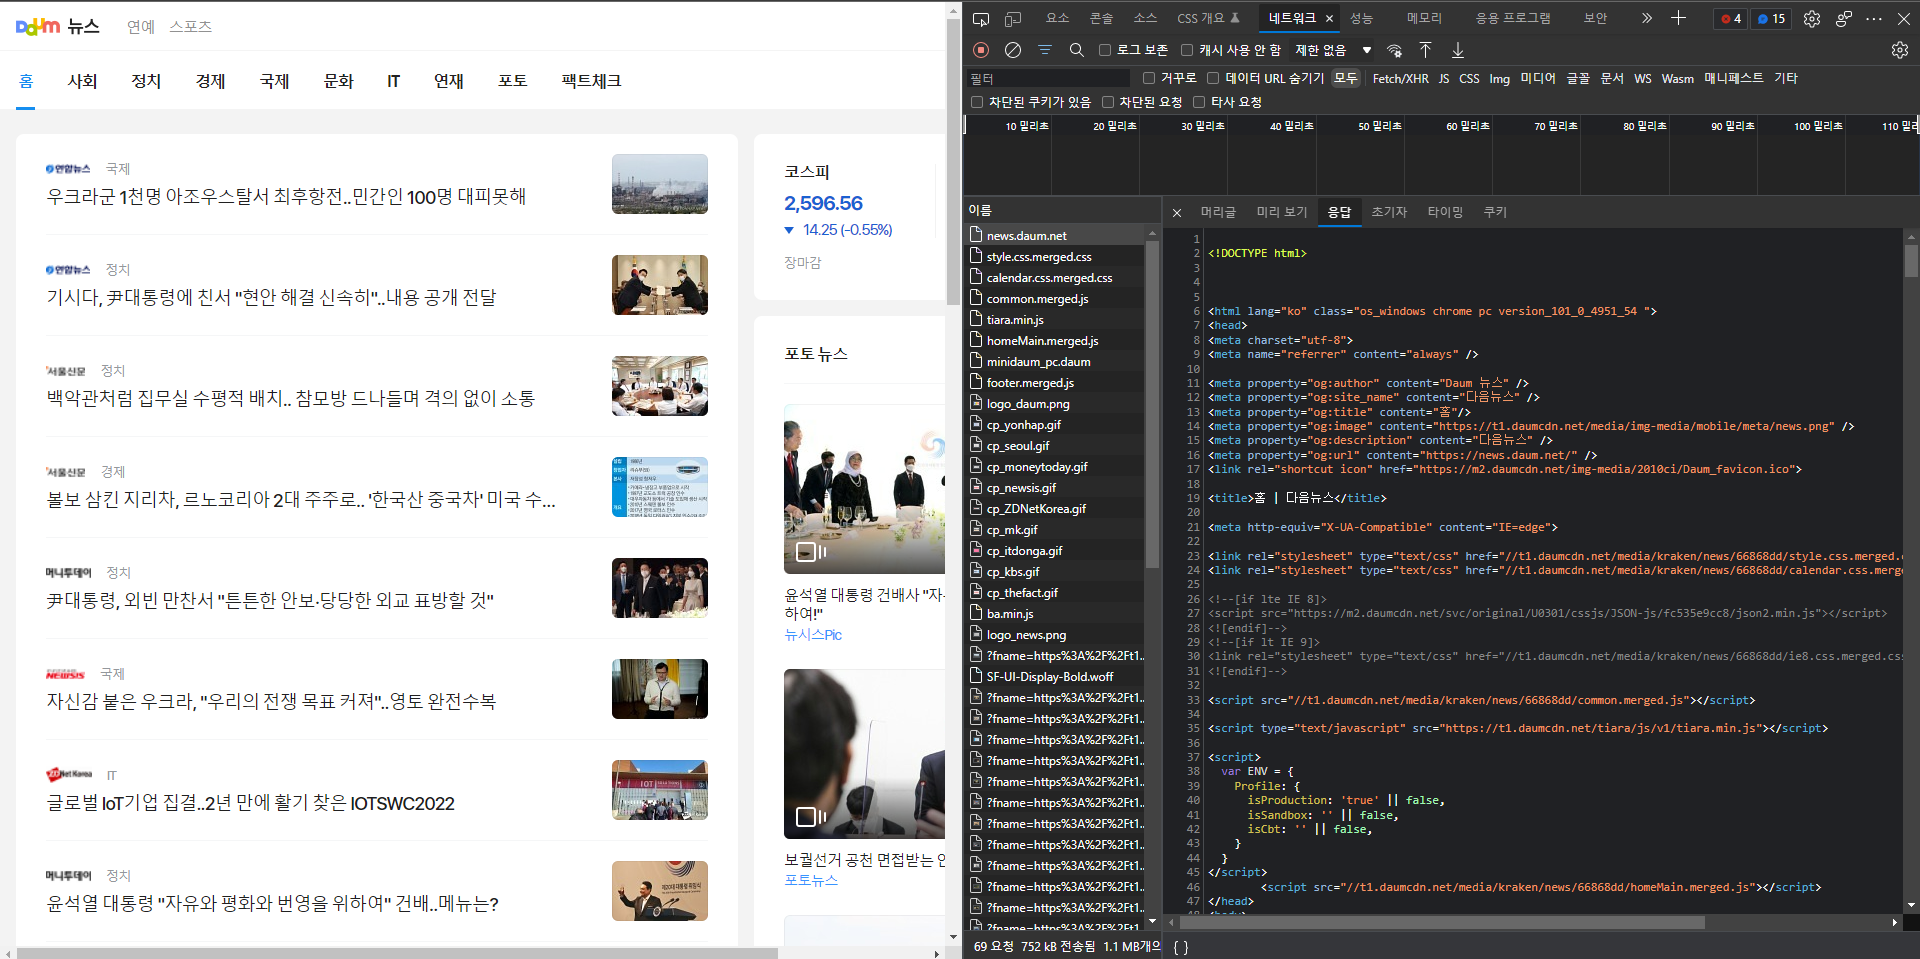

#### 웹브라우저의 개발자 도구 -> 네트워크 -> 응답 부분에서 해당하는 주소의 응답값을 확인할 수 있음

#### res.content를 통해 불러온 응답값을 확인할 수 있음

In [4]:
res.content

b'\n<!DOCTYPE html>\n\n\n\n<html lang="ko" class="os_unknown none unknown version_0 ">\n<head>\n<meta charset="utf-8">\n<meta name="referrer" content="always" />\n\n<meta property="og:author" content="Daum \xeb\x89\xb4\xec\x8a\xa4" />\n<meta property="og:site_name" content="\xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4" />\n<meta property="og:title" content="\xed\x99\x88"/>\n<meta property="og:image" content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" />\n<meta property="og:description" content="\xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4" />\n<meta property="og:url" content="https://news.daum.net/" />\n<link rel="shortcut icon" href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico">\n\n<title>\xed\x99\x88 | \xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4</title>\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/66868dd/style.css.merged.css" />\n<link rel="style

#### BeautifulSoup library를 통해 받아온 응답값(res.content)과 html 구문으로 나누어주는 'html.parser'를 인자값으로 넘겨주면 객체에 응답값이 html 구조로 정리됨

In [7]:
soup = BeautifulSoup(res.content, 'html.parser')

In [8]:
soup


<!DOCTYPE html>

<html class="os_unknown none unknown version_0 " lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="always" name="referrer">
<meta content="Daum 뉴스" property="og:author"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="홈" property="og:title"/>
<meta content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" property="og:image"/>
<meta content="다음뉴스" property="og:description"/>
<meta content="https://news.daum.net/" property="og:url"/>
<link href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>
<title>홈 | 다음뉴스</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//t1.daumcdn.net/media/kraken/news/66868dd/style.css.merged.css" rel="stylesheet" type="text/css">
<link href="//t1.daumcdn.net/media/kraken/news/66868dd/calendar.css.merged.css" rel="stylesheet" type="text/css"/>
<!--[if lte IE 8]>
<script src="https://m2.daumcdn.net/svc/original/U0301/cssjs/JSON-js/fc535e9cc8/json2.min.js"><

#### html 정보가 저장된 soup 객체에서 기사 제목에 해당하는 부분의 요소만 선택

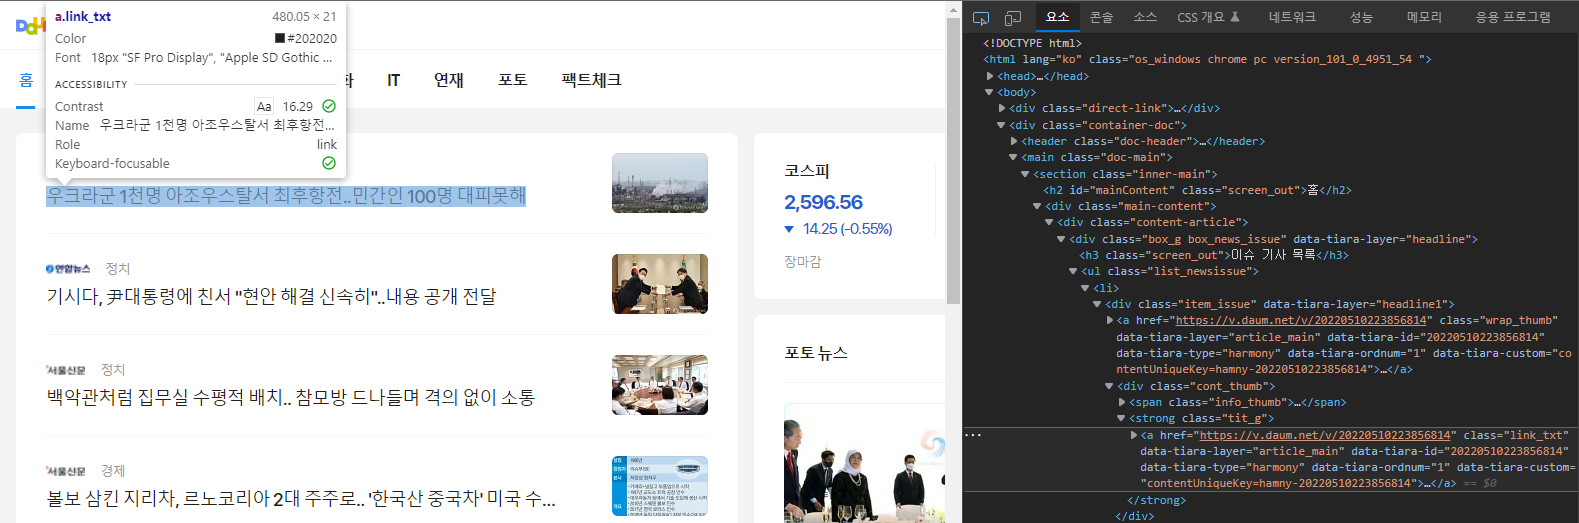

#### 기사 제목은 "html > body > div > main > section > ... > div > strong > a" 부분에 포함되어 있음

#### soup.select('div > strong > a')를 통해 'div > strong > a'에 해당하는 요소들만 불러올 수 있음

In [11]:
items = soup.select('div > strong > a')

In [12]:
items

[<a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20220510223454789" data-tiara-id="20220510223454789" data-tiara-layer="article_main" data-tiara-ordnum="1" data-tiara-type="harmony" href="https://v.daum.net/v/20220510223454789">
                                     기시다, 尹대통령에 친서 "현안 해결 신속히"..내용 공개 전달
                                 </a>,
 <a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20220510223111767" data-tiara-id="20220510223111767" data-tiara-layer="article_main" data-tiara-ordnum="2" data-tiara-type="harmony" href="https://v.daum.net/v/20220510223111767">
                                     백악관처럼 집무실 수평적 배치.. 참모방 드나들며 격의 없이 소통
                                 </a>,
 <a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20220510223108765" data-tiara-id="20220510223108765" data-tiara-layer="article_main" data-tiara-ordnum="3" data-tiara-type="harmony" href="https://v.daum.net/v/20220510223108765">
                                     볼보 삼킨 지리차

#### 리스트의 첫번째 항목에서 text 부분만 추출하고 .strip() 함수를 통해 앞,뒤 공백을 제거

In [14]:
items[0].text.strip()

'기시다, 尹대통령에 친서 "현안 해결 신속히"..내용 공개 전달'

#### 리스트의 첫번째 항목에서 'href' 속성만 불러올 수 있음

In [15]:
items[0].attrs['href']

'https://v.daum.net/v/20220510223454789'

#### 위의 text 추출, href 속성 추출 두 가지를 모든 item에 대하여 적용하여 DataFrame으로 나타냄

In [20]:
title=[]
url = []

for i in range(len(items)):
    
    title.append(items[i].text.strip())
    url.append(items[i].attrs['href'])

list_sum = list(zip(title,url))

col = ['title','url']

df = pd.DataFrame(list_sum, columns=col)
df.to_csv('./data/daum_new.xlsx', index=False)

In [21]:
df

,title,url
0,"기시다, 尹대통령에 친서 ""현안 해결 신속히""..내용 공개 전달",https://v.daum.net/v/20220510223454789
1,백악관처럼 집무실 수평적 배치.. 참모방 드나들며 격의 없이 소통,https://v.daum.net/v/20220510223111767
2,"볼보 삼킨 지리차, 르노코리아 2대 주주로.. '한국산 중국차' 미국 수출 야심",https://v.daum.net/v/20220510223108765
3,"尹대통령, 외빈 만찬서 ""튼튼한 안보·당당한 외교 표방할 것""",https://v.daum.net/v/20220510222833741
4,"자신감 붙은 우크라, ""우리의 전쟁 목표 커져""..영토 완전수복",https://v.daum.net/v/20220510222733730
5,글로벌 IoT기업 집결..2년 만에 활기 찾은 IOTSWC2022,https://v.daum.net/v/20220510222354696
6,"윤석열 대통령 ""자유와 평화와 번영을 위하여"" 건배..메뉴는?",https://v.daum.net/v/20220510222152679
7,같은듯 다른듯..김건희 김정숙 취임식 드레스코드 비교해보니,https://v.daum.net/v/20220510222101664
8,"스마트폰과 외부 마이크, 어떻게 연결해야 하나요?",https://v.daum.net/v/20220510222102668
9,"""세대 갈등 줄이자""..체험형 효행 교육 강화",https://v.daum.net/v/20220510221938648
